In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
import skgstat as skg

In [2]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\ETM Images Raw\\Havard"
cwd_Images_Processed = cwd + "\\ETM Images Processed\\Havard"

In [3]:
# Read NIRV reflectance raster image
img_1000 = rio.open(cwd_Images_Processed + "\\Albedo 1000m.tif")
band_1000 = img_1000.read(1)
band_1000.shape

(35, 35)

In [4]:
band_1000_reshape = band_1000.reshape(-1)

In [5]:
# Get the coordinates
list_Coordinates = []
for x in range(img_1000.shape[0]):
    for y in range(img_1000.shape[1]):
        temp_x, temp_y = img_1000.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates.append(temp_list)
arr_Coordinates_1000 = np.array(list_Coordinates)
arr_Coordinates_1000

array([[ 731820., 4713900.],
       [ 731850., 4713900.],
       [ 731880., 4713900.],
       ...,
       [ 732780., 4712880.],
       [ 732810., 4712880.],
       [ 732840., 4712880.]])

In [6]:
# Get the maximum lag
diagonal_1000 = 1000 * (2 ** 0.5) / 2
bin_1000 = np.arange(30,diagonal_1000,30)
bin_1000

array([ 30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300., 330.,
       360., 390., 420., 450., 480., 510., 540., 570., 600., 630., 660.,
       690.])

In [7]:
V_1000 = skg.Variogram(arr_Coordinates_1000, band_1000_reshape, use_nugget=True, bin_func=bin_1000, maxlag = bin_1000[-1])
V_1000.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 476099.99999999994,
 'normalized_sill': 7683179251438.922,
 'normalized_nugget': 5145512414460.855,
 'effective_range': 689.9999999999999,
 'sill': 2039433.7401565854,
 'nugget': 1365831.9407920516,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 690.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

c:\ProgramData\Anaconda3\envs\DISC\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


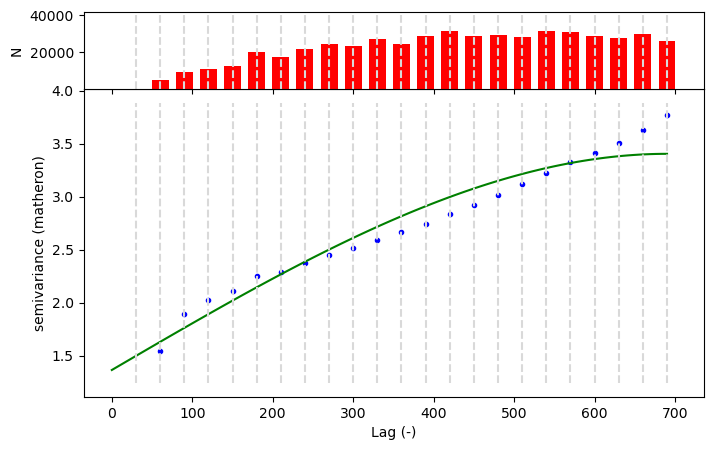

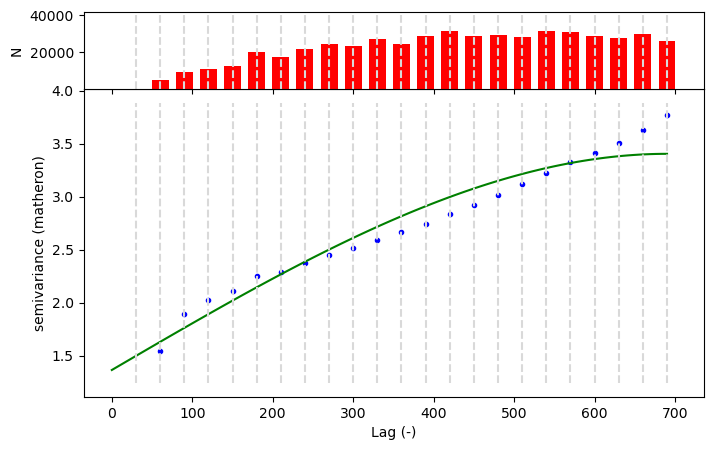

In [8]:
V_1000.plot()